In [3]:
#Original equation: 0.996x^2 - 1.9343x - 14.149
#R^2 = 0.9993

import pandas as pd
import numpy as np

calc = pd.DataFrame(np.zeros([16,14],dtype=float),columns=['a0','a1','a2','x','Actual y','Predicted y','Diff','sum_Diff','v0', \
                                                          'v1','v2','sum_v0','sum_v1','sum_v2'])

In [4]:
#DF for calculating the gradient vector and cost function (difference in y)

#Initialize values
calc['x'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
calc['Actual y'] = [21.21217914,9.001978895,0.747344201,-6.70555256,-11.32007117,-14.36436262,-15.72039677,-13.02638345, \
                    -11.99715765,-5.789431156,1.622636555,10.91513494,20.78728975,34.84557539,48.3673002,65.90865069]

#Number of samples m
m = 16

#Set initial values of a0,a1,a2
calc['a0'] = 0
calc['a1'] = 0
calc['a2'] = 0

for i in range(0,m):
    #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
    calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
    calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
    calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
    calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
    calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
    #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
    calc['sum_v0'][i] = calc['v0'][i]
    calc['sum_v1'][i] = calc['v1'][i]
    calc['sum_v2'][i] = calc['v2'][i]
    calc['sum_Diff'][i] = calc['Diff'][i]

calc['sum_Diff'] = calc['sum_Diff'].cumsum()
calc['sum_v0'] = calc['sum_v0'].cumsum()
calc['sum_v1'] = calc['sum_v1'].cumsum()
calc['sum_v2'] = calc['sum_v2'].cumsum()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [5]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,0,0,0,-5,21.212179,0.0,14.061142,14.061142,-1.325761,6.628806,-33.144030,-1.325761,6.628806,-33.144030
1,0,0,0,-4,9.001979,0.0,2.532363,16.593505,-0.562624,2.250495,-9.001979,-1.888385,8.879301,-42.146009
2,0,0,0,-3,0.747344,0.0,0.017454,16.610959,-0.046709,0.140127,-0.420381,-1.935094,9.019428,-42.566390
3,0,0,0,-2,-6.705553,0.0,1.405139,18.016098,0.419097,-0.838194,1.676388,-1.515997,8.181234,-40.890002
4,0,0,0,-1,-11.320071,0.0,4.004500,22.020598,0.707504,-0.707504,0.707504,-0.808492,7.473729,-40.182497
5,0,0,0,0,-14.364363,0.0,6.447966,28.468564,0.897773,0.000000,0.000000,0.089280,7.473729,-40.182497
6,0,0,0,1,-15.720397,0.0,7.722840,36.191404,0.982525,0.982525,0.982525,1.071805,8.456254,-39.199973
7,0,0,0,2,-13.026383,0.0,5.302708,41.494112,0.814149,1.628298,3.256596,1.885954,10.084552,-35.943377
8,0,0,0,3,-11.997158,0.0,4.497868,45.991981,0.749822,2.249467,6.748401,2.635776,12.334019,-29.194975
9,0,0,0,4,-5.789431,0.0,1.047422,47.039403,0.361839,1.447358,5.789431,2.997616,13.781377,-23.405544


In [6]:
#Number of iterations
n = 80

learn = pd.DataFrame(np.zeros([n,7],dtype=float),columns=['Cost function','a0_rate','a1_rate','a2_rate','new_a0', \
                                                          'new_a1','new_a2'])

In [7]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Converges relatively quickly without oscillation or diverging
#k0 = 0.2
#k1 = 0.002
#k2 = 0.0002
kk0 = []
kk1 = []
kk2 = []

for i in range(0,n):
    kk0.append(0.2*(np.exp(i/30)))
    kk1.append(0.002*(np.exp(i/30)))
    kk2.append(0.0002*(np.exp(i/30)))

print(kk0)
print(kk1)
print(kk2)

[0.2, 0.20677902270271484, 0.21378782114944928, 0.22103418361512955, 0.22852616235914455, 0.23627208257312918, 0.244280551632034, 0.2525604686587603, 0.26112103441299045, 0.26997176151520064, 0.2791224850172179, 0.28858337333106737, 0.2983649395282541, 0.30847805302203496, 0.3189339516456631, 0.32974425414002567, 0.34092097306455066, 0.3524765281457317, 0.3644237600781018, 0.3767759447929926, 0.3895468082109352, 0.40275054149409534, 0.4164018168156911, 0.4305158036639175, 0.4451081856984936, 0.46019517817856503, 0.47579354598132695, 0.49192062223139, 0.508594327561591, 0.525833190026651, 0.5436563656918091, 0.5620836599193101, 0.5811355493764003, 0.6008332047892867, 0.6211985144683441, 0.6422541086307123, 0.6640233845473095, 0.6865305325422083, 0.7098005628732609, 0.7338593335238489, 0.7587335789366355, 0.7844509397212532, 0.811039993368935, 0.8385302860082234, 0.8669523652370418, 0.8963378140676129, 0.9267192860219438, 0.9581305414168757, 0.990606484879023, 1.0241832041312802, 1.05889

In [9]:
#Number of iteration is set to 30 (n=30) based on previous DF

#Learning rate k for a0, a1, a2

#Converges but slow
# k0 = 0.1
# k1 = 0.01
# k2 = 0.001

#Converges but a0 and a1 have slight oscillation
#k0 = 0.13
#k1 = 0.013
#k2 = 0.001

#Converges relatively quickly without oscillation or diverging
#k0 = 0.2
#k1 = 0.002
#k2 = 0.0002


#Set parameters
a0 = 0
a1 = 0
a2 = 0

for j in range(0,n):
    learn['Cost function'][j] = calc['sum_Diff'][15]
    learn['a0_rate'][j] = kk0[j]*calc['sum_v0'][15]
    learn['a1_rate'][j] = kk1[j]*calc['sum_v1'][15]
    learn['a2_rate'][j] = kk2[j]*calc['sum_v2'][15]
    a0 -= learn['a0_rate'][j]
    a1 -= learn['a1_rate'][j]
    a2 -= learn['a2_rate'][j]
    learn['new_a0'][j] = a0
    learn['new_a1'][j] = a1
    learn['new_a2'][j] = a2
    #New cost function after changing parameters
    
    #Remember to change values of a0,a1,a2 before calculating
    calc['a0'] = a0
    calc['a1'] = a1
    calc['a2'] = a2
    
    for i in range(0,m):
        #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
        calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
        calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
        calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
        calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
        calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
        #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
        calc['sum_v0'][i] = calc['v0'][i]
        calc['sum_v1'][i] = calc['v1'][i]
        calc['sum_v2'][i] = calc['v2'][i]
        calc['sum_Diff'][i] = calc['Diff'][i]

    #Calculate summations for gradient vector and cost function to be used in the calculation DF
    calc['sum_Diff'] = calc['sum_Diff'].cumsum()
    calc['sum_v0'] = calc['sum_v0'].cumsum()
    calc['sum_v1'] = calc['sum_v1'].cumsum()
    calc['sum_v2'] = calc['sum_v2'].cumsum()
    

    
    
    
    


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [10]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,311.147048,-1.681059,-0.171471,-0.182066,1.681059,0.171471,0.182066
1,160.249329,-0.266483,-0.092959,-0.110562,1.947542,0.264431,0.292628
2,109.486972,0.481152,-0.047856,-0.070394,1.466390,0.312287,0.363023
3,87.976322,0.845442,-0.021999,-0.048266,0.620949,0.334286,0.411289
4,75.280688,0.996788,-0.006890,-0.036197,-0.375839,0.341176,0.447485
5,65.787917,1.034317,0.002403,-0.029551,-1.410156,0.338773,0.477036
6,57.967860,1.013760,0.008639,-0.025732,-2.423916,0.330133,0.502769
7,51.344534,0.965353,0.013304,-0.023340,-3.389269,0.316829,0.526109
8,45.702179,0.904914,0.017164,-0.021648,-4.294183,0.299665,0.547757
9,40.892515,0.840424,0.020591,-0.020300,-5.134607,0.279074,0.568057


In [11]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,-14.179209,-1.929854,0.993379,-5,21.212179,20.304544,0.025744,0.025744,-0.056727,0.283636,-1.418180,-0.056727,0.283636,-1.418180
1,-14.179209,-1.929854,0.993379,-4,9.001979,9.434276,0.005840,0.031584,0.027019,-0.108074,0.432298,-0.029709,0.175562,-0.985882
2,-14.179209,-1.929854,0.993379,-3,0.747344,0.550767,0.001208,0.032791,-0.012286,0.036858,-0.110575,-0.041995,0.212420,-1.096457
3,-14.179209,-1.929854,0.993379,-2,-6.705553,-6.345983,0.004040,0.036832,0.022473,-0.044946,0.089892,-0.019522,0.167474,-1.006564
4,-14.179209,-1.929854,0.993379,-1,-11.320071,-11.255975,0.000128,0.036960,0.004006,-0.004006,0.004006,-0.015516,0.163468,-1.002558
5,-14.179209,-1.929854,0.993379,0,-14.364363,-14.179209,0.001071,0.038031,0.011572,0.000000,0.000000,-0.003943,0.163468,-1.002558
6,-14.179209,-1.929854,0.993379,1,-15.720397,-15.115684,0.011427,0.049459,0.037795,0.037795,0.037795,0.033851,0.201262,-0.964764
7,-14.179209,-1.929854,0.993379,2,-13.026383,-14.065400,0.033736,0.083195,-0.064939,-0.129877,-0.259754,-0.031087,0.071385,-1.224518
8,-14.179209,-1.929854,0.993379,3,-11.997158,-11.028358,0.029330,0.112525,0.060550,0.181650,0.544950,0.029463,0.253035,-0.679568
9,-14.179209,-1.929854,0.993379,4,-5.789431,-6.004557,0.001446,0.113972,-0.013445,-0.053781,-0.215126,0.016017,0.199254,-0.894694


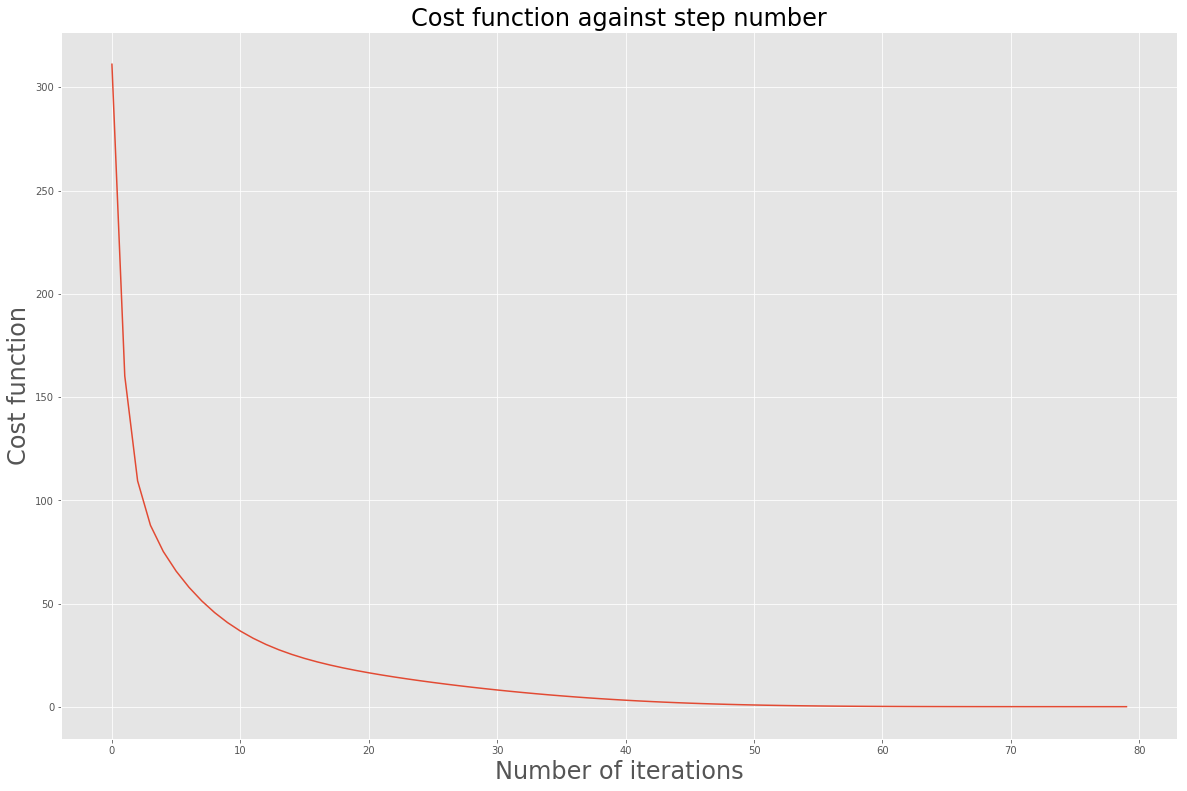

In [25]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(learn.index.values,learn['Cost function'].values)
plt.title('Cost function against step number',fontsize=24)
plt.xlabel('Number of iterations',fontsize=24)
plt.ylabel('Cost function',fontsize=24)
plt.savefig('Error_function_23May.png')


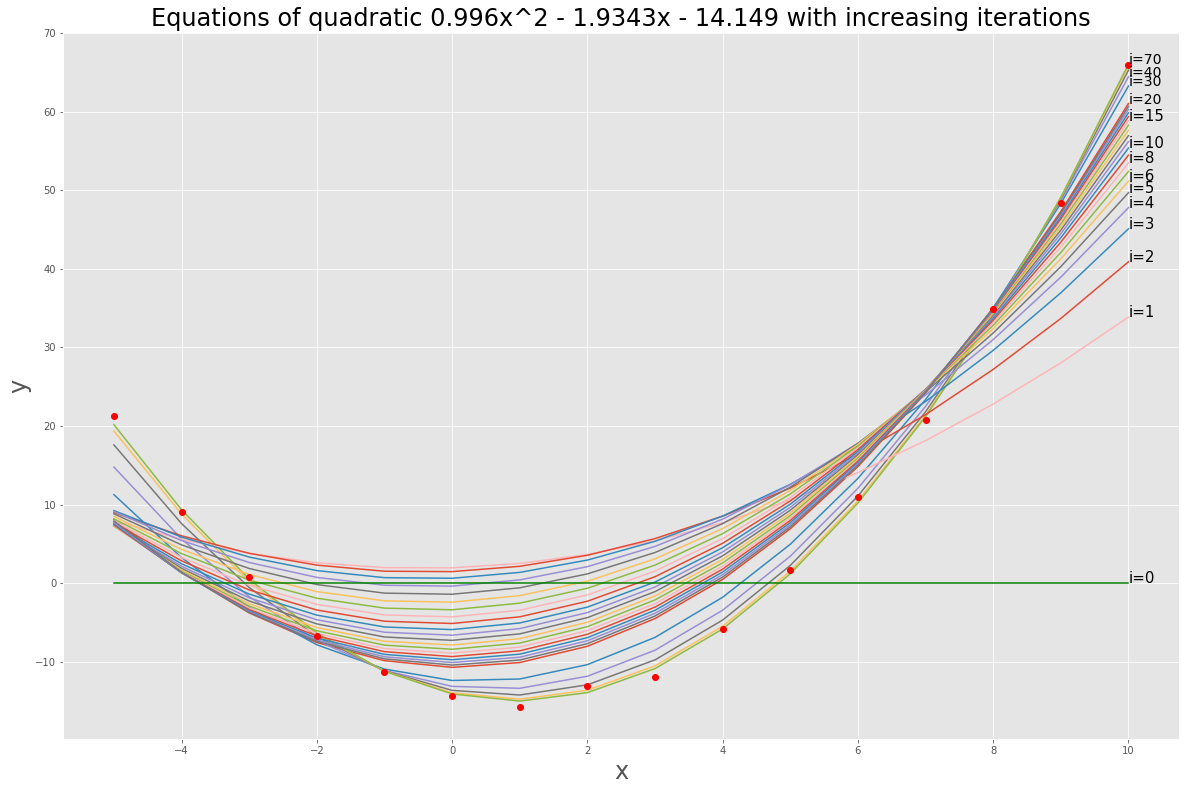

In [22]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = []

plt.rcParams["figure.figsize"] = (20,13)

#get 8 graphs, use a0,a1,a2 of iteration 0,10,20,30,40,50,60,70 which is actually step 1,11,21,31,41,51,61,71
for i in range(2,8):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i*10]+learn['new_a1'][i*10]*x[j]+learn['new_a2'][i*10]*(x[j]**2))
    plt.plot(x,y)
    if i != 5 and i !=6:
        plt.text(10, y[15], 'i='+str(i*10), fontsize=14)



#get 9 graphs from iteration 1-9 which is step 2-11 (iteration 0,10 or step 1,11 are covered by above)
for i in range(1,20):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i]+learn['new_a1'][i]*x[j]+learn['new_a2'][i]*(x[j]**2))
    plt.plot(x,y)
    if i not in [7,9,11,12,13,14,16,17,18,19]:
        plt.text(10, y[15], 'i='+str(i), fontsize=15)

    
plt.plot(x,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'g-') #baseline with green line 'g-'
plt.plot(x, [21.21217914,9.001978895,0.747344201,-6.70555256,-11.32007117,-14.36436262,-15.72039677,-13.02638345, \
                    -11.99715765,-5.789431156,1.622636555,10.91513494,20.78728975,34.84557539,48.3673002,65.90865069], 'ro')
plt.title('Equations of quadratic 0.996x^2 - 1.9343x - 14.149 with increasing iterations', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.text(10, 0, r'i=0', fontsize=15)
plt.savefig('Gradient_descent_23may.png')


#Actual best fit line
#a0= -13.970346 a1=-1.911492 a2=0.987684

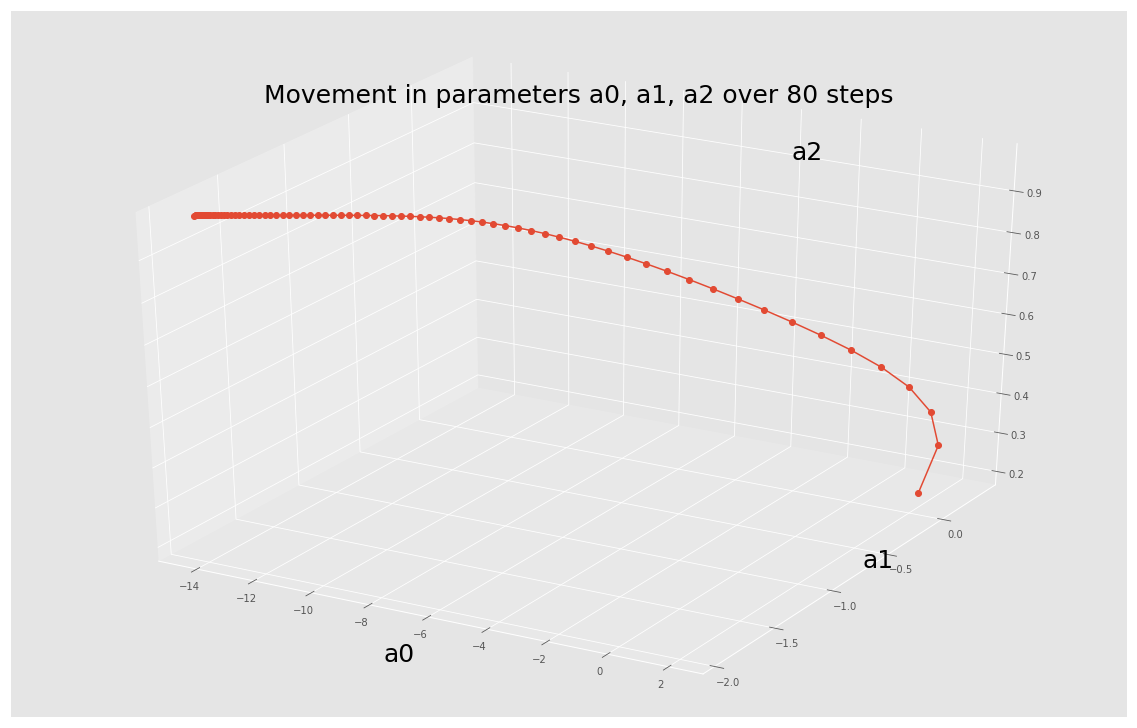

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
# parachange.text(x=0, y=0, z=0, text="red", color='red')
parachange.plot(xs=learn['new_a0'].values,ys=learn['new_a1'].values,zs=learn['new_a2'].values,marker='o')
parachange.text(0.5, 0, 0, s='a1', zdir=None, size=25)
parachange.text(-8, -2, 0, s='a0', zdir=None, size=25)
parachange.text(-8, 1.5, 0.7, s='a2', zdir=None, size=25)
parachange.text(-16, -1, 1.1, s='Movement in parameters a0, a1, a2 over 80 steps', zdir=None, size=25)
plt.savefig('Parameter_Change_23May.png')

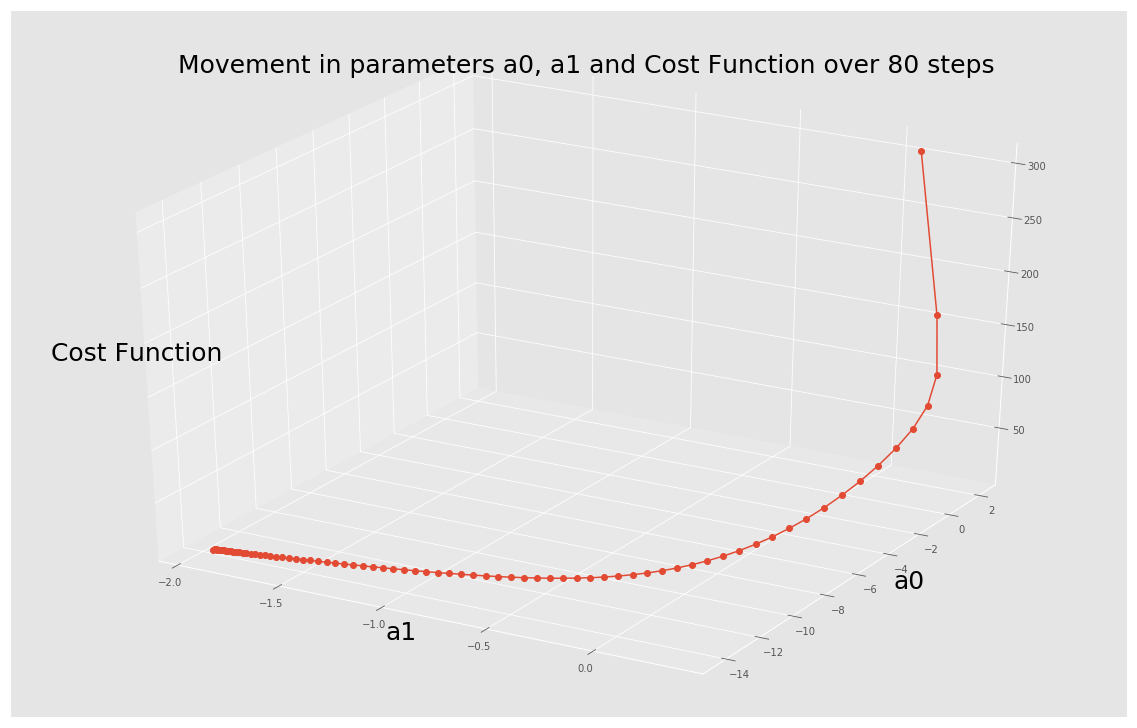

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a1'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')
parachange.text(-0.75, -18, 0, s='a1', zdir=None, size=25)
parachange.text(0.75, -7, 0, s='a0', zdir=None, size=25)
parachange.text(-2.5, -16, 175, s='Cost Function', zdir=None, size=25)
parachange.text(-2.75, -6, 350, s='Movement in parameters a0, a1 and Cost Function over 80 steps', zdir=None, size=25)
plt.savefig('Parameter_CostFx_Change_23May.png')

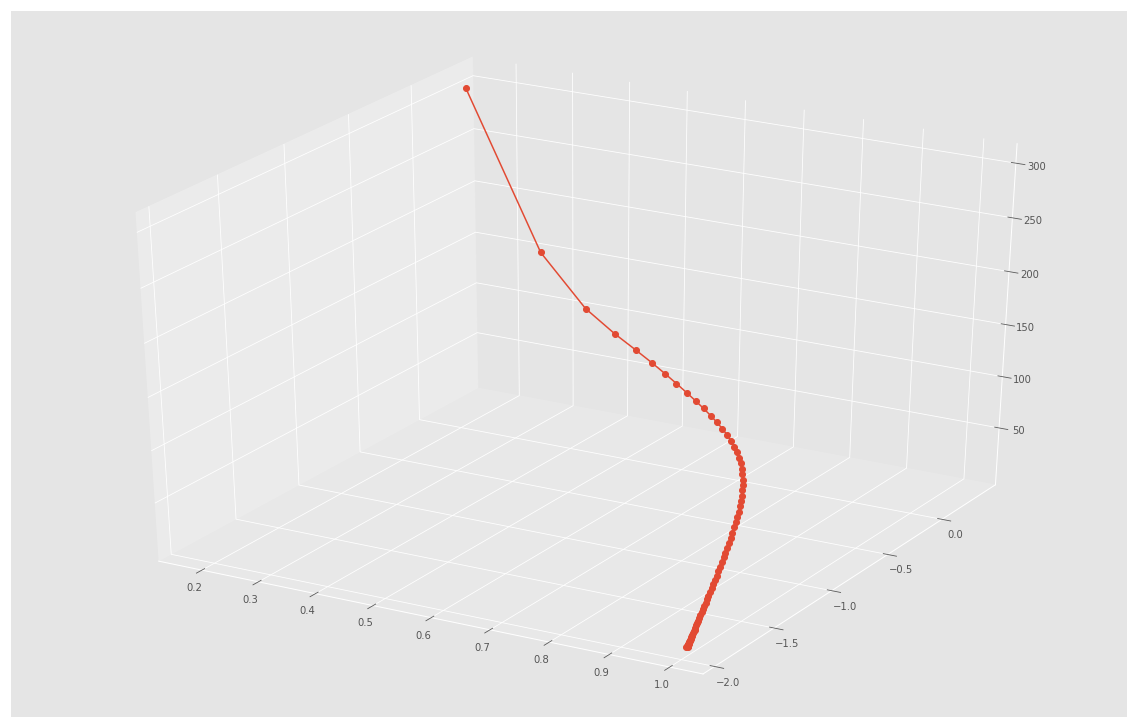

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a1'].values,zs=learn['Cost function'].values,marker='o')

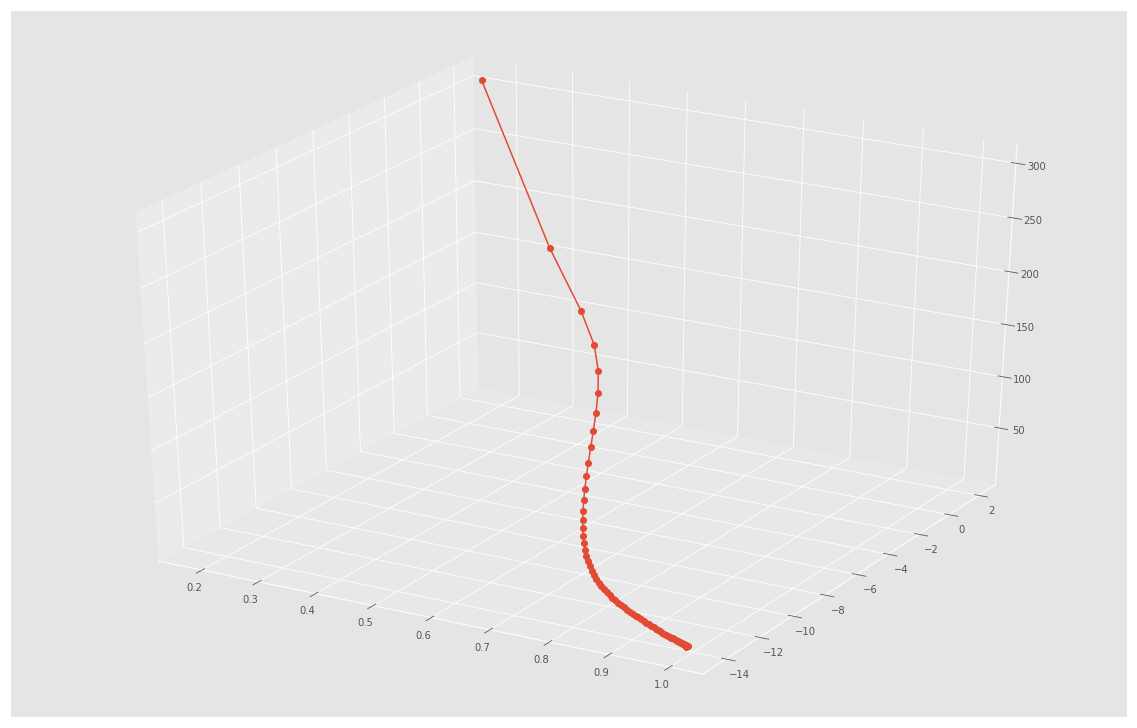

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')